# Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [129]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [130]:
# loading the data
startups = pd.read_csv("C:\\Excelr Data\\Assignments\\Multi Linear Regression\\50_Startups.csv")
type(startups)

pandas.core.frame.DataFrame

In [131]:
#startups

In [132]:
# to get top 6 rows
startups.head(10)


,RnDspend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,NewYork,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,NewYork,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [133]:
dummy_startups = pd.get_dummies(startups)
#dummy_startups

In [134]:
# Correlation matrix 
dummy_startups.corr()

,RnDspend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
RnDspend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MarketingSpend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NewYork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [135]:
type(dummy_startups)

pandas.core.frame.DataFrame

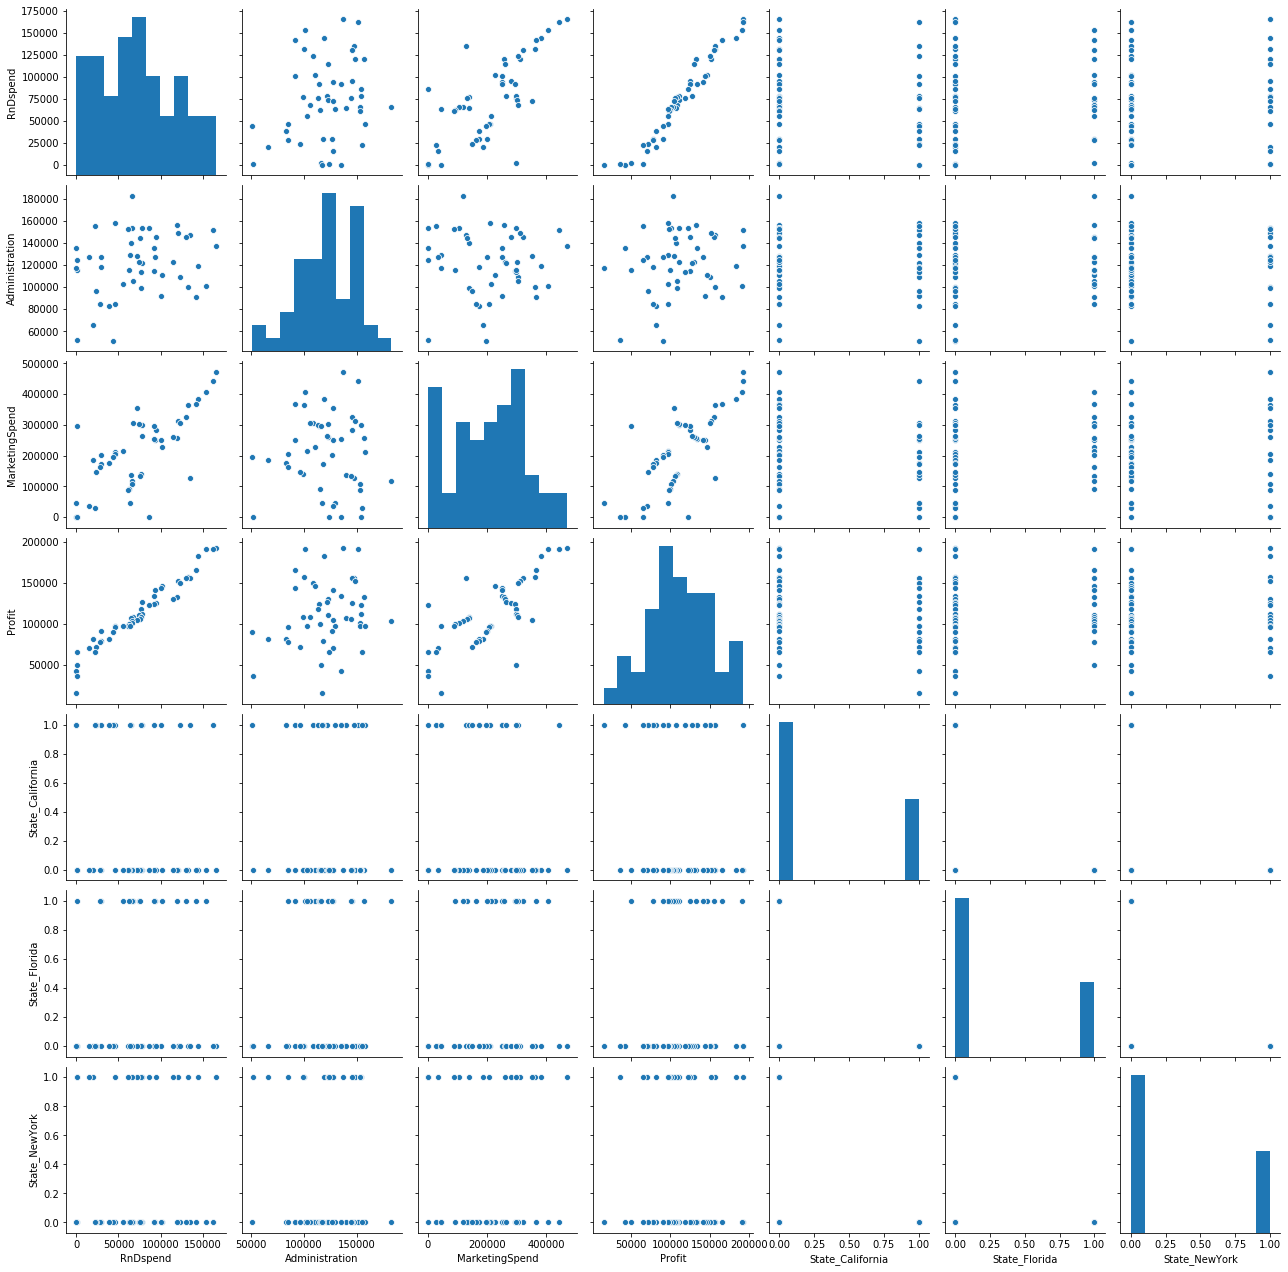

In [136]:
# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(dummy_startups.iloc[:,:])

In [137]:
# columns names
dummy_startups.columns

Index(['RnDspend', 'Administration', 'MarketingSpend', 'Profit',
       'State_California', 'State_Florida', 'State_NewYork'],
      dtype='object')

In [138]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model      

In [139]:
# Preparing model                  
ml1 = smf.ols('Profit~RnDspend+Administration+MarketingSpend+State_California+State_Florida+State_NewYork',data=dummy_startups).fit() 
ml1
# regression model

In [140]:
# Getting coefficients of variables               
ml1.params

Intercept           37633.233317
RnDspend                0.806023
Administration         -0.027004
MarketingSpend          0.026980
State_California    12492.110514
State_Florida       12690.899307
State_NewYork       12450.223495
dtype: float64

In [141]:
# Summary
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 17 May 2020   Prob (F-statistic):           1.34e-27
Time:                        22:11:24   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RnDspend             0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
MarketingSpend       0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_NewYork     1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [142]:
# Adj. R-squared:	0.945 ,R-squared:	0.951,PValue of Administration= 0.608 >0.05 and MarketingSpend = 0.123 >0.05

In [143]:
pred = ml1.predict(dummy_startups) # Predicted values of AT using the model
pred

0     192390.571365
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292789
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725742
19    115594.188411
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311047
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364708
46     56272.992679
47     46468.232003
48     49123.073082
49     48185.038790


In [144]:
# p-values for MarketingSpend,Administration are more than 0.05 

In [145]:
# preparing model based only on MarketingSpend
ml_m=smf.ols('Profit~MarketingSpend',data = dummy_startups).fit()  

In [146]:
ml_m.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 17 May 2020   Prob (F-statistic):           4.38e-10
Time:                        22:11:55   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MarketingSpend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
# Adj. R-squared:	0.550
# p-value <0.00 .. It is significant

In [148]:
# Preparing model based only on Administration
ml_a=smf.ols('Profit~Administration',data = dummy_startups).fit()  

In [93]:
ml_a.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 15 May 2020   Prob (F-statistic):              0.162
Time:                        21:28:51   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
# Adj. R-squared:	0.020
# p-value =0.162 >0.05 .. It is not significant

In [150]:
# Preparing model based only on Administration & MarketingSpend
ml_am=smf.ols('Profit~Administration+MarketingSpend',data = dummy_startups).fit()  

In [151]:
ml_am.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sun, 17 May 2020   Prob (F-statistic):           2.50e-10
Time:                        22:15:26   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
MarketingSpend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
# Adj. R-squared:	0.593
# p-value of Administration=0.017 <0.05  and p-value of MarketingSpend=0.00 < 0.05 .. It is  significant

In [153]:
# Both coefficients p-value became insignificant... 
# So there may be a chance of considering only one among Administration & MarketingSpend

# Checking whether data has any influential values 
# influence index plots

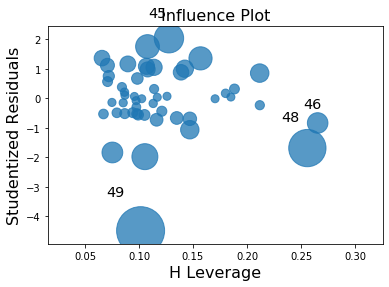

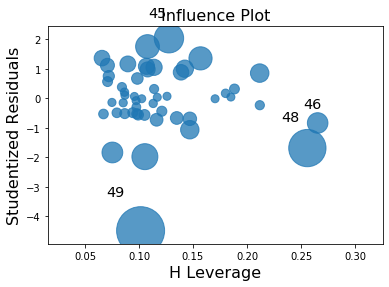

In [155]:
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)
# index 45,46,48 AND 49 is showing high influence so we can exclude that entire row

# Studentized Residuals = Residual/standard deviation of residuals

In [159]:
#?stsrtups.drop
startups_new = dummy_startups.drop(dummy_startups.index[[45,46,48,49]],axis=0) # ,inplace=False)
startups_new

,RnDspend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [161]:
# Preparing model                  
ml_new = smf.ols('Profit~RnDspend+Administration+MarketingSpend+State_California+State_Florida+State_NewYork',data = startups_new).fit()    

In [162]:
# Getting coefficients of variables        
ml_new.params

Intercept           42280.418829
RnDspend                0.773029
Administration         -0.052036
MarketingSpend          0.028312
State_California    14979.282075
State_Florida       14066.853639
State_NewYork       13234.283115
dtype: float64

In [163]:
# Summary
ml_new.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     208.2
Date:                Sun, 17 May 2020   Prob (F-statistic):           1.62e-27
Time:                        22:17:04   Log-Likelihood:                -470.78
No. Observations:                  46   AIC:                             953.6
Df Residuals:                      40   BIC:                             964.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.228e+04   4468.067      9.463      0.000    3.33e+04    5.13e+04
RnDspend             0.7730      0.041     18.962      0.000       0.691       0.855
Administration      -0.0520      0.044     -1.184      0.243      -0.141       0.037
MarketingSpend       0.0283      0.015      1.911      0.063      -0.002       0.058
State_California  1.498e+04   1982.369      7.556      0.000     1.1e+04     1.9e+04
State_Florida     1.407e+04   2183.694      6.442      0.000    9653.444    1.85e+04
State_NewYork     1.323e+04   2226.862      5.943      0.000    8733.626    1.77e+04
==============================================================================
Omnibus:                        0.122   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.332
Skew:                           0.011   Prob(JB):                        0.847
Kurtosis:                       2.584   Cond. No.                     3.10e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.92e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [164]:
# Adj. R-squared:	0.958, 

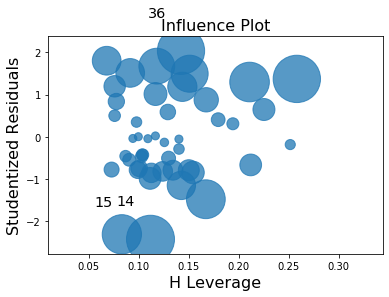

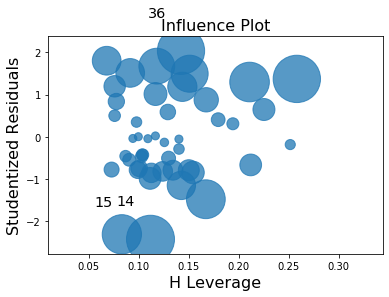

In [165]:
sm.graphics.influence_plot(ml_new)

In [167]:
startups_1= startups_new.drop(startups_new.index[[14,15,36]],axis=0) # ,inplace=False)
startups_1

,RnDspend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [168]:
# Preparing model                  
ml_1 = smf.ols('Profit~RnDspend+Administration+MarketingSpend+State_California+State_Florida+State_NewYork',data = startups_1).fit()    

In [169]:
# Getting coefficients of variables        
ml_1.params

Intercept           41825.709060
RnDspend                0.816149
Administration         -0.055536
MarketingSpend          0.019318
State_California    14614.163432
State_Florida       13556.657732
State_NewYork       13654.887895
dtype: float64

In [170]:
ml_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     292.7
Date:                Sun, 17 May 2020   Prob (F-statistic):           1.13e-28
Time:                        22:18:11   Log-Likelihood:                -432.38
No. Observations:                  43   AIC:                             876.8
Df Residuals:                      37   BIC:                             887.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.183e+04   3799.988     11.007      0.000    3.41e+04    4.95e+04
RnDspend             0.8161      0.036     22.612      0.000       0.743       0.889
Administration      -0.0555      0.038     -1.468      0.150      -0.132       0.021
MarketingSpend       0.0193      0.013      1.521      0.137      -0.006       0.045
State_California  1.461e+04   1707.288      8.560      0.000    1.12e+04    1.81e+04
State_Florida     1.356e+04   1859.442      7.291      0.000    9789.070    1.73e+04
State_NewYork     1.365e+04   1943.816      7.025      0.000    9716.343    1.76e+04
==============================================================================
Omnibus:                        5.884   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                2.896
Skew:                           0.379   Prob(JB):                        0.235
Kurtosis:                       1.979   Cond. No.                     1.53e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.51e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [171]:
#Adj. R-squared:	0.972

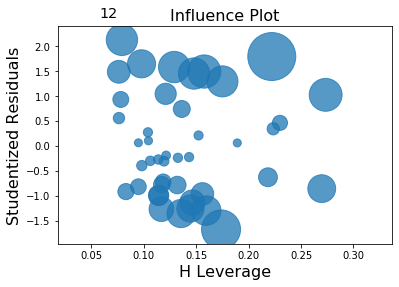

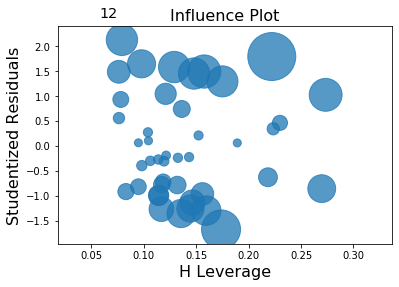

In [172]:
sm.graphics.influence_plot(ml_1)

In [174]:
startups_2= startups_1.drop(startups_1.index[[12]],axis=0) # ,inplace=False)
startups_2

,RnDspend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [175]:
# Preparing model                  
ml_2 = smf.ols('Profit~RnDspend+Administration+MarketingSpend+State_California+State_Florida+State_NewYork',data = startups_2).fit()    

In [176]:
ml_2.params

Intercept           41910.680033
RnDspend                0.815439
Administration         -0.058669
MarketingSpend          0.019303
State_California    14959.940142
State_Florida       12921.881478
State_NewYork       14028.858412
dtype: float64

In [177]:
ml_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     318.2
Date:                Sun, 17 May 2020   Prob (F-statistic):           9.96e-29
Time:                        22:18:53   Log-Likelihood:                -420.33
No. Observations:                  42   AIC:                             852.7
Df Residuals:                      36   BIC:                             863.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.191e+04   3631.279     11.542      0.000    3.45e+04    4.93e+04
RnDspend             0.8154      0.034     23.643      0.000       0.745       0.885
Administration      -0.0587      0.036     -1.622      0.113      -0.132       0.015
MarketingSpend       0.0193      0.012      1.590      0.121      -0.005       0.044
State_California  1.496e+04   1639.473      9.125      0.000    1.16e+04    1.83e+04
State_Florida     1.292e+04   1801.677      7.172      0.000    9267.911    1.66e+04
State_NewYork     1.403e+04   1865.709      7.519      0.000    1.02e+04    1.78e+04
==============================================================================
Omnibus:                        5.361   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                2.550
Skew:                           0.322   Prob(JB):                        0.279
Kurtosis:                       1.980   Cond. No.                     1.38e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.8e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

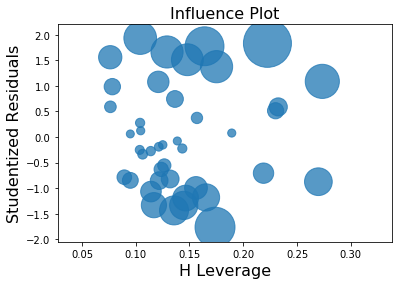

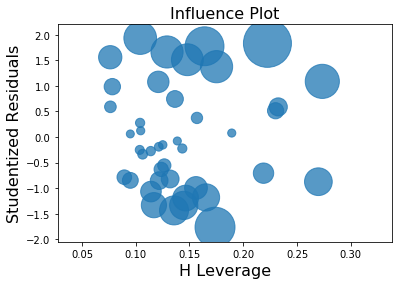

In [178]:
sm.graphics.influence_plot(ml_2)

In [195]:
#Preparing Final model 
ml_final = smf.ols('Profit~RnDspend+MarketingSpend+State_California+State_Florida+State_NewYork',data=startups_2).fit() 
ml_final

In [197]:
ml_final.params

Intercept           36579.967482
RnDspend                0.792413
MarketingSpend          0.027389
State_California    13229.207023
State_Florida       11323.484149
State_NewYork       12027.276311
dtype: float64

In [198]:
ml_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     380.3
Date:                Sun, 17 May 2020   Prob (F-statistic):           1.69e-29
Time:                        22:25:21   Log-Likelihood:                -421.81
No. Observations:                  42   AIC:                             853.6
Df Residuals:                      37   BIC:                             862.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.658e+04   1578.674     23.171      0.000    3.34e+04    3.98e+04
RnDspend             0.7924      0.032     24.671      0.000       0.727       0.857
MarketingSpend       0.0274      0.011      2.422      0.020       0.004       0.050
State_California  1.323e+04   1271.936     10.401      0.000    1.07e+04    1.58e+04
State_Florida     1.132e+04   1541.237      7.347      0.000    8200.641    1.44e+04
State_NewYork     1.203e+04   1429.921      8.411      0.000    9129.981    1.49e+04
==============================================================================
Omnibus:                        2.837   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.445
Skew:                           0.485   Prob(JB):                        0.294
Kurtosis:                       2.326   Cond. No.                     1.50e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.3e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [204]:
pred_final = ml_final.predict(startups_2)
pred_final

0     192553.596868
1     190811.455928
2     180665.245859
3     173505.110961
4     170539.986907
5     163046.471111
6     159978.183954
7     160023.904142
8     152661.348084
9     155894.348348
10    134937.091259
11    136423.091408
13    129625.273846
16    118867.842972
17    131354.118213
18    128684.109310
19    117087.324411
20    118413.725077
21    118933.462243
22    114845.192199
23    109764.295607
24    113508.059368
25    104828.929390
26    111266.464511
27    115419.454977
28    103479.442659
29    103528.243051
30     99524.634378
31     99468.673707
32    101317.381955
33     97756.125097
34     92371.249326
35     90698.192084
37     90127.135991
38     69711.589041
39     85156.425205
40     77327.112589
41     74510.788072
42     72596.099575
43     61867.415881
44     68159.149932
47     49809.174505
dtype: float64

In [ ]:
#R-squared:	0.976,Adj. R-squared:	0.974 and Pvalue of MarketingSpend = 0.020 
# So final model is better model and Pvalue is Significant.
# This model is best for profit